In [1]:
import numpy as np
import pylab as plt
import pandas as pd
import seaborn as sns

In [2]:
import sys
sys.path.append('../../data')
from corpus import load_corpus
data = load_corpus('weebit')

text_features_df = data['text_features_df']
features_mask = data['features_mask']
features_y_mask = data['features_y_mask']
X_all = data['X_all']
y_all = data['y_all']
feature_names = data['feature_names']

Using TensorFlow backend.


## Features Statistics

In [3]:
text_features_df.loc[:, features_mask].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
feature_adj,3636.0,0.088694,0.033933,0.000000,0.067629,0.087379,0.108696,0.259259
feature_adverbs,3636.0,0.518306,0.284784,0.000000,0.333333,0.500000,0.666667,3.000000
feature_avgnpsize,3636.0,2.935227,0.614295,1.000000,2.555556,2.883156,3.260357,9.875000
feature_avgparsetreeheight,3636.0,5.591294,1.075038,2.000000,4.857143,5.571429,6.285714,10.333333
feature_avgppsize,3636.0,4.103977,1.059090,0.000000,3.500000,4.000000,4.623463,11.714286
feature_avgvpsize,3636.0,6.786518,1.695810,0.000000,5.736455,6.666667,7.700000,22.583333
feature_conj,3636.0,0.114909,0.029512,0.000000,0.097087,0.115132,0.132665,0.285714
feature_interj,3636.0,0.007128,0.027863,0.000000,0.000000,0.000000,0.000000,0.571429
feature_modals,3636.0,0.160147,0.154682,0.000000,0.041667,0.125000,0.238095,1.000000
feature_nouns,3636.0,0.326616,0.093565,0.093023,0.286141,0.322581,0.355455,2.788732


## Features Correlations

In [4]:
fs_corr_df = text_features_df.loc[:, features_mask].corr()

In [5]:
fs_single_corrs = (fs_corr_df.unstack()
                     .sort_values(ascending=False)
                         [len(fs_corr_df):][::2])

In [6]:
fs_single_corrs.head(10)

feature_numconstituents             feature_senlen                   0.920825
feature_avgparsetreeheight          feature_numconstituents          0.903634
feature_numnp                       feature_senlen                   0.887388
feature_rs_sqrt_polysyllable/sents  feature_rs_polysyllable/words    0.884264
feature_numfuncwords                feature_numconstituents          0.870925
feature_rs_polysyllable/words       feature_rs_syllables/words       0.864091
feature_numfuncwords                feature_senlen                   0.862974
feature_numnp                       feature_numconstituents          0.854490
feature_rs_long/words               feature_rs_chars/words           0.831405
feature_pronouns                    feature_perpro                   0.825856
dtype: float64

In [7]:
fs_single_corrs.tail(10)

feature_numvp                  feature_rs_sents/words          -0.660134
feature_rs_sents/words         feature_numpp                   -0.681220
feature_rs_monosyllable/words  feature_rs_chars/words          -0.782088
                               feature_rs_long/words           -0.799466
feature_rs_sents/words         feature_numfuncwords            -0.822965
feature_numnp                  feature_rs_sents/words          -0.824528
feature_rs_sents/words         feature_avgparsetreeheight      -0.832141
feature_numconstituents        feature_rs_sents/words          -0.876756
feature_senlen                 feature_rs_sents/words          -0.895000
feature_rs_syllables/words     feature_rs_monosyllable/words   -0.901472
dtype: float64

In [8]:
fs_single_corrs[(fs_single_corrs < 0.01) & (fs_single_corrs > -0.01)]

feature_rs_long/words               feature_numvbd                   0.008810
feature_numwh                       feature_avgppsize                0.007948
feature_numnp                       feature_nouns                    0.007784
feature_avgppsize                   feature_whpro                    0.006932
feature_numprep                     feature_whpro                    0.006802
feature_numdet                      feature_rs_long/words            0.005925
feature_avgppsize                   feature_interj                   0.005758
feature_whpro                       feature_interj                   0.005500
feature_numvbn                      feature_numvbp                   0.005434
feature_numnp                       feature_numvb                    0.005251
feature_num_comma                   feature_nouns                    0.004836
feature_numvb                       feature_avgppsize                0.004828
feature_perpro                      feature_numpp               

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


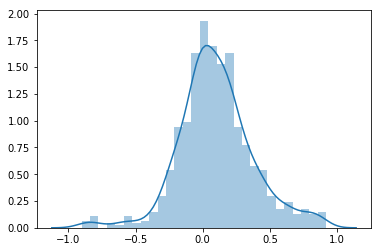

In [9]:
sns.distplot(fs_single_corrs)

/home/users/shlohod/.local/lib/python3.5/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


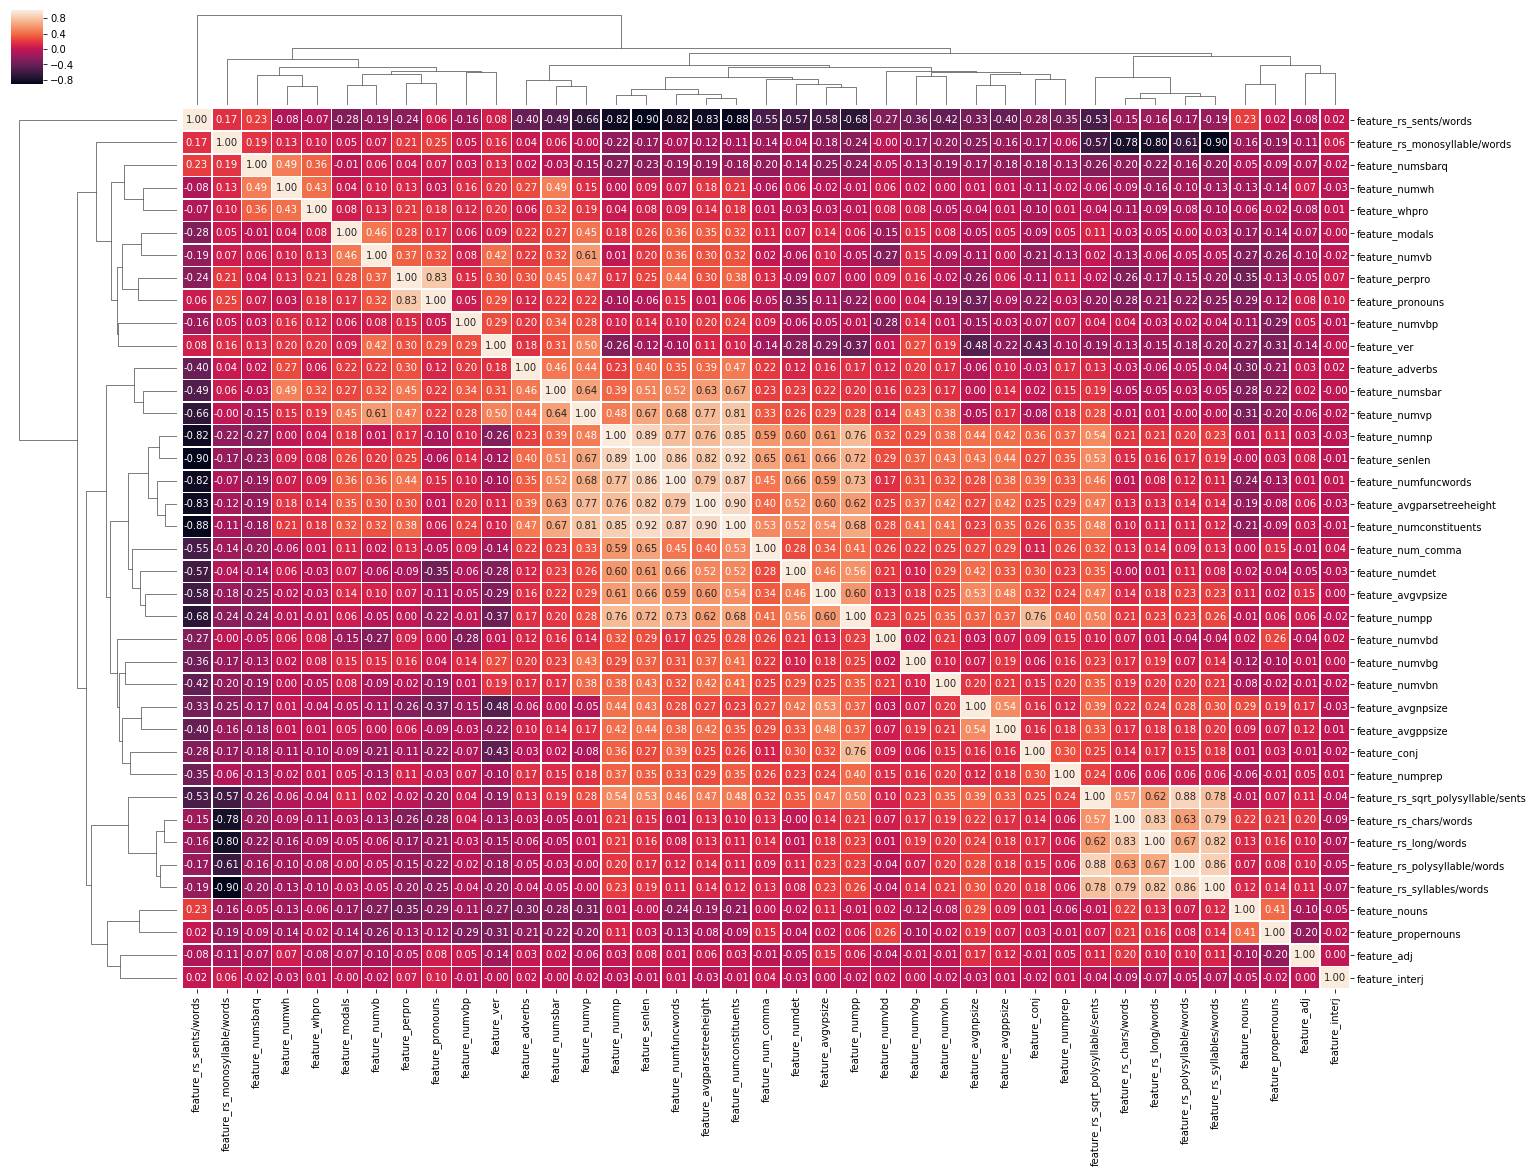

In [10]:
features_clustering = sns.clustermap(fs_corr_df, annot=True, fmt='0.2f', linewidths=.5, figsize=(24, 18))
plt.tight_layout()
plt.savefig('features_clustring.png', dpi=300)


In [11]:
ordered_features_columns = np.take(text_features_df.columns[features_mask],
                    [i for i in features_clustering.dendrogram_col.reordered_ind])
#sns.pairplot(text_features_df[ordered_features_columns])

## Features Distribution by Label

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


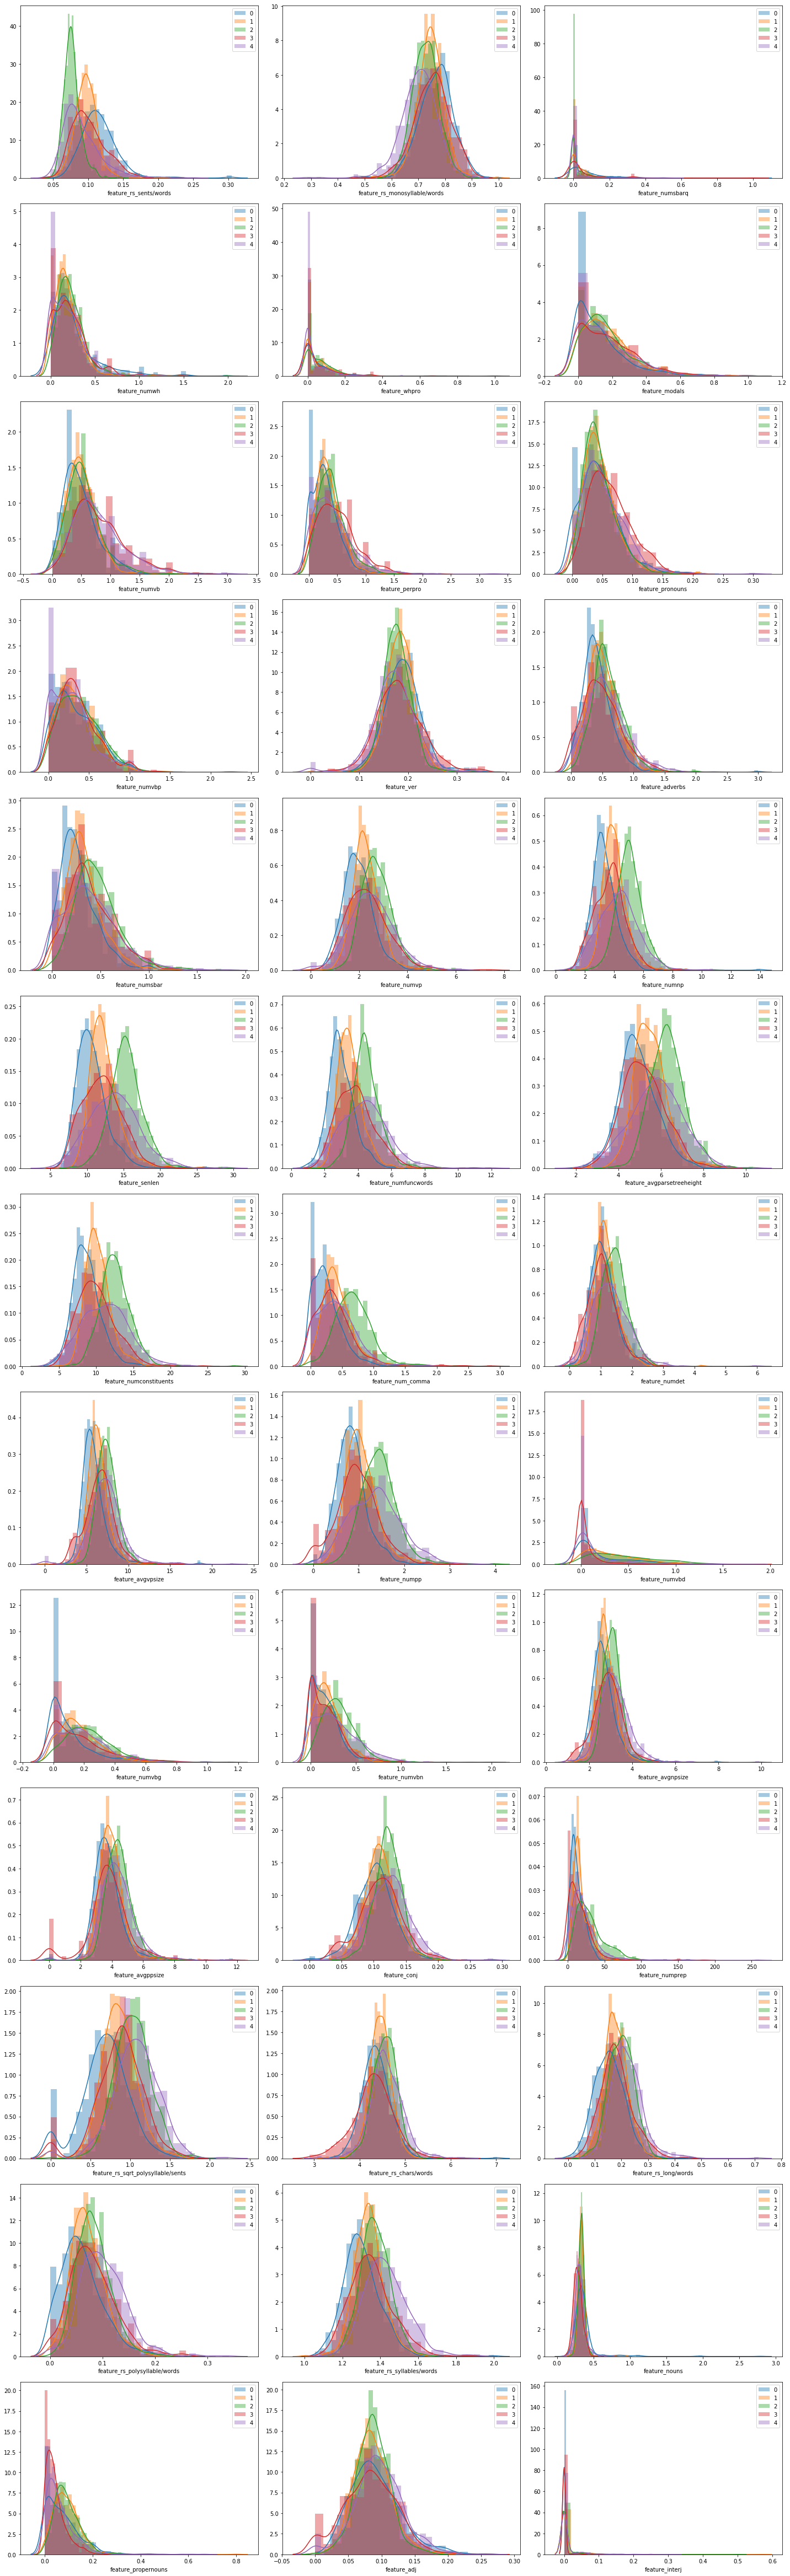

In [12]:
import itertools as it

n_rows = len(feature_names)//3 + int(len(feature_names) % 3 != 0)

f, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))
axes = it.chain(*axes)

for feature_name, ax in zip(ordered_features_columns, axes):
    for y_value in np.sort(text_features_df['y'].unique()): 
        sns.distplot(text_features_df[text_features_df['y']==y_value][feature_name],
                     label=str(y_value), ax=ax)
    ax.legend()
    
for ax in axes:
    ax.set_visible(False)

plt.tight_layout()

plt.savefig('features-distirbution-by-label.png', dpi=300)

## Feature Importance

### ANOVA F-value to Features

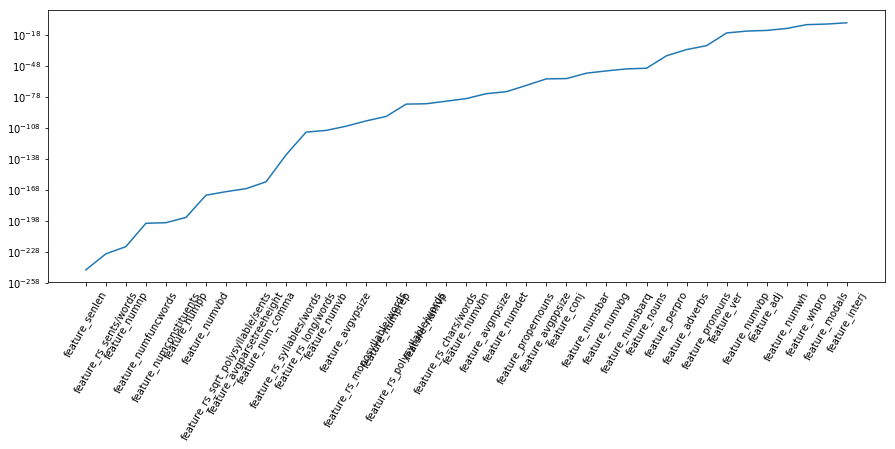

In [13]:
from sklearn.feature_selection import f_classif

_, p_values = f_classif(X_all, y_all)

features_f_classif_order = np.argsort(p_values)
p_values.sort()

f, ax = plt.subplots(figsize=(15, 5))
ax.plot(p_values)
plt.xticks(range(len(p_values)),
           (text_features_df.columns[features_mask][features_f_classif_order]),
          rotation=60)
ax.set_yscale("log")

### Extra Trees

/home/users/shlohod/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Feature ranking:
1. feature_numvbd (0.049711)
2. feature_numfuncwords (0.037453)
3. feature_senlen (0.036545)
4. feature_rs_sents/words (0.035066)
5. feature_propernouns (0.034820)
6. feature_numvb (0.032171)
7. feature_nouns (0.031818)
8. feature_numnp (0.030934)
9. feature_num_comma (0.030328)
10. feature_numprep (0.029895)
11. feature_numconstituents (0.028870)
12. feature_numpp (0.028517)
13. feature_rs_syllables/words (0.027855)
14. feature_rs_chars/words (0.026924)
15. feature_avgparsetreeheight (0.026647)
16. feature_rs_sqrt_polysyllable/sents (0.026558)
17. feature_avgnpsize (0.025992)
18. feature_rs_long/words (0.024639)
19. feature_avgvpsize (0.024022)
20. feature_rs_monosyllable/words (0.023326)
21. feature_rs_polysyllable/words (0.023069)
22. feature_adj (0.022889)
23. feature_perpro (0.022795)
24. feature_numdet (0.022376)
25. feature_numvbn (0.022313)
26. feature_numvbg (0.021916)
27. feature_numvbp (0.021898)
28. feature_pronouns (0.021826)
29. feature_numvp (0.021629)
3

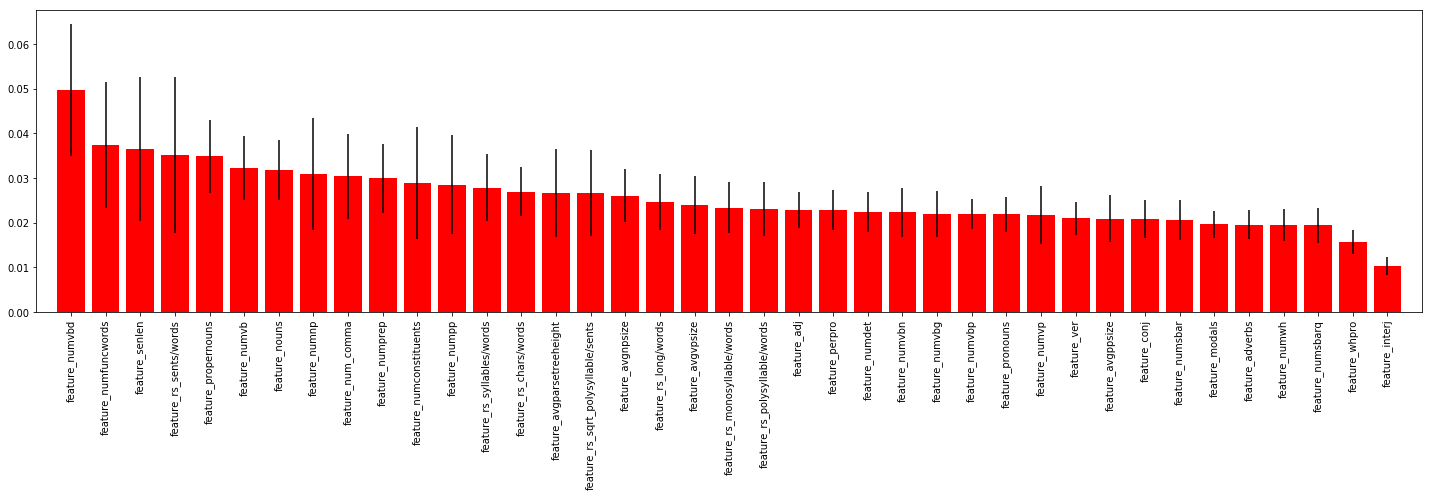

In [14]:
from sklearn.ensemble import ExtraTreesClassifier

forest_model = ExtraTreesClassifier(n_estimators=250,
                              random_state=42)
forest_model.fit(X_all, y_all)

importances = forest_model.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

ordered_feature_names = np.take(feature_names, indices
                               )
for f in range(X_all.shape[1]):
    print("%d. %s (%f)" % (f + 1, ordered_feature_names[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20, 7))
#plt.title("Feature importances")
plt.bar(range(X_all.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_all.shape[1]), ordered_feature_names, rotation=90)
plt.xlim([-1, X_all.shape[1]])
plt.tight_layout()
plt.savefig('features-importance-extra-trees.png', dpi=300)

## Embedding Visualization

In [15]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from umap import UMAP

def plot_embedding(embedder, X, y, title=''):
    embedding = embedder.fit_transform(X_all)
    f, ax = plt.subplots(figsize=(15, 15))
    for y_value in np.sort(y_all.unique()):
        mask = (y == y_value)
        
        ax.scatter(embedding[mask, 0], embedding[mask, 1],
                c=sns.color_palette()[y_value], label=y_value, s=8)

    f.gca().set_aspect('equal', 'datalim')
    plt.legend()
    plt.title(embedder.__class__.__name__ + title)

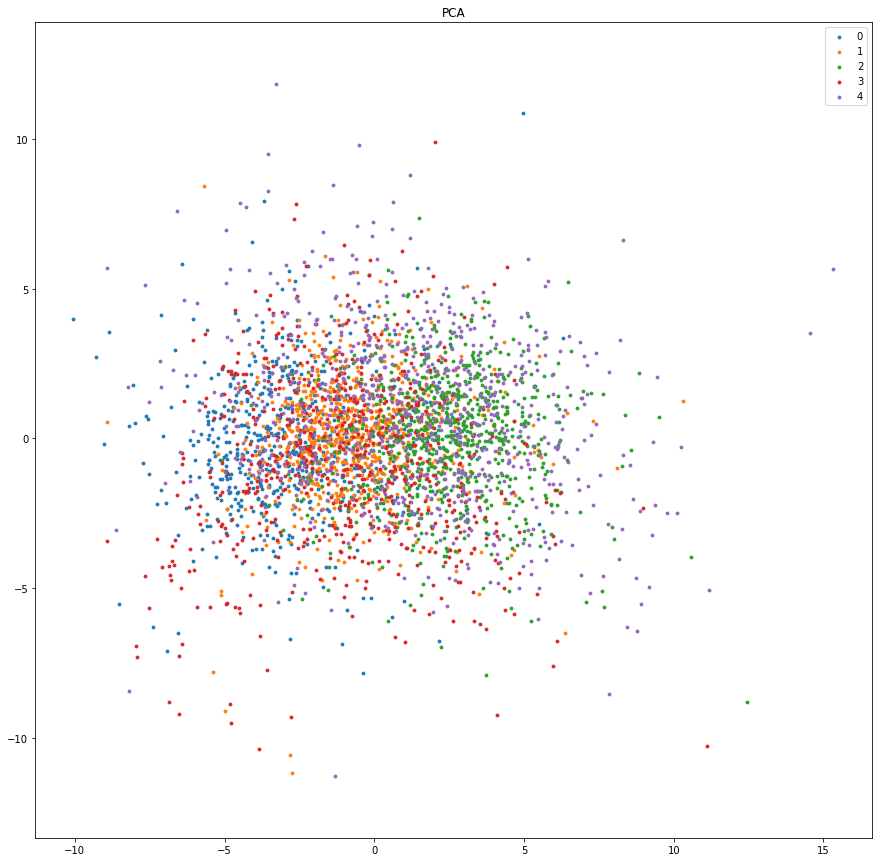

In [16]:
plot_embedding(PCA(), X_all, y_all)

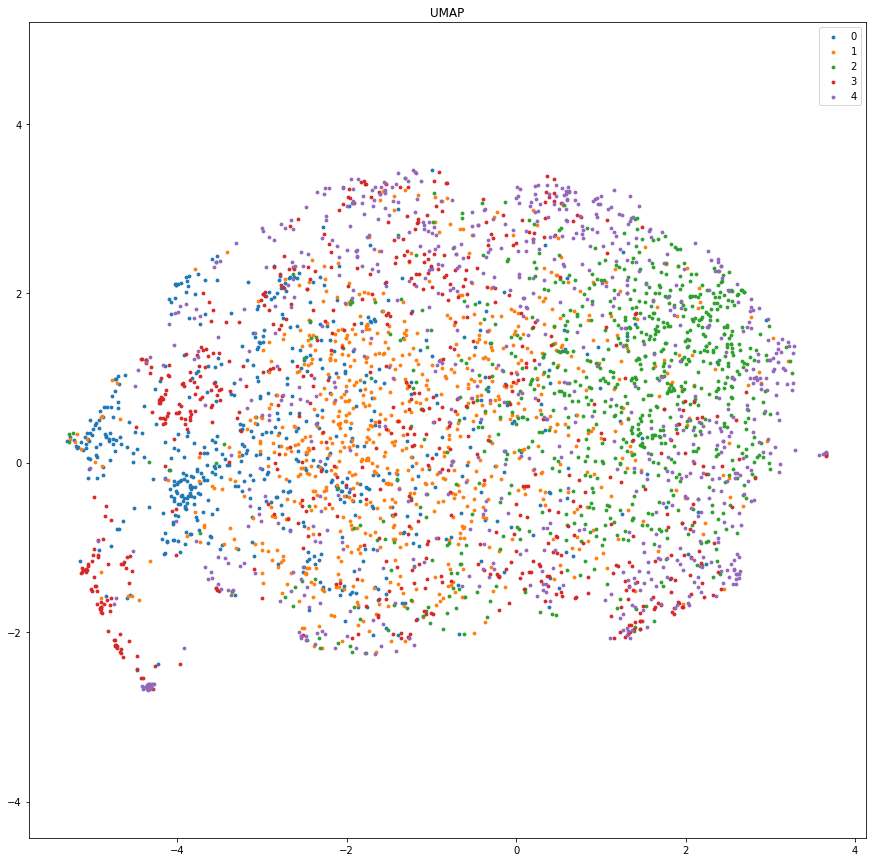

In [17]:
plot_embedding(UMAP(random_state=42), X_all, y_all)

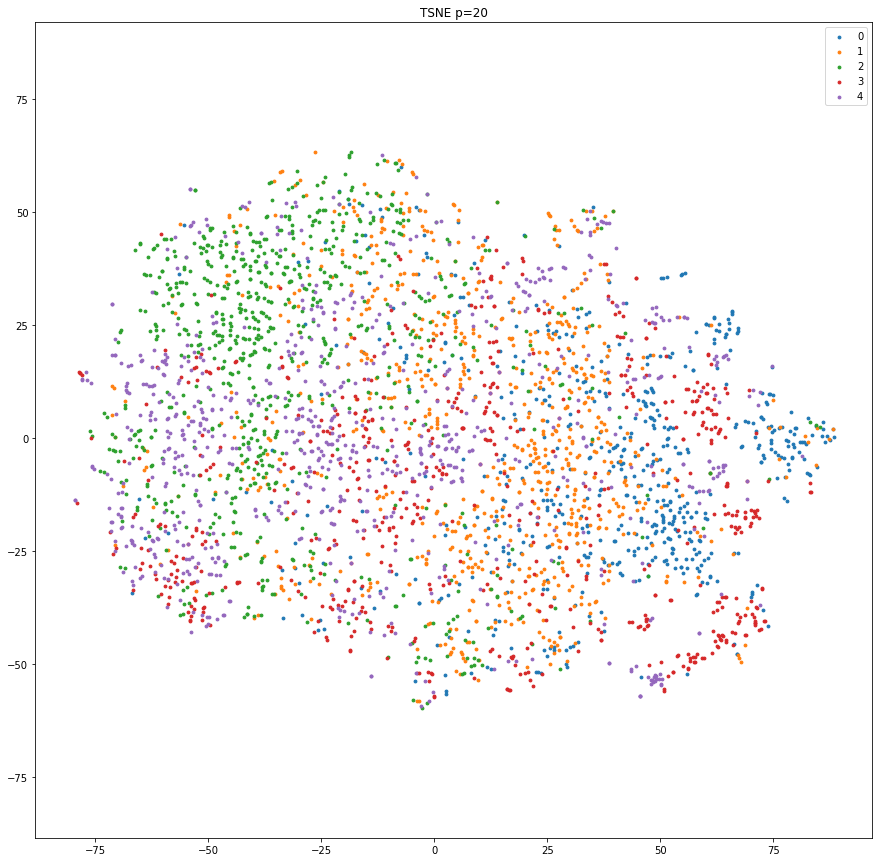

In [18]:
plot_embedding(TSNE(perplexity=20, random_state=42), X_all, y_all, title=' p=20')

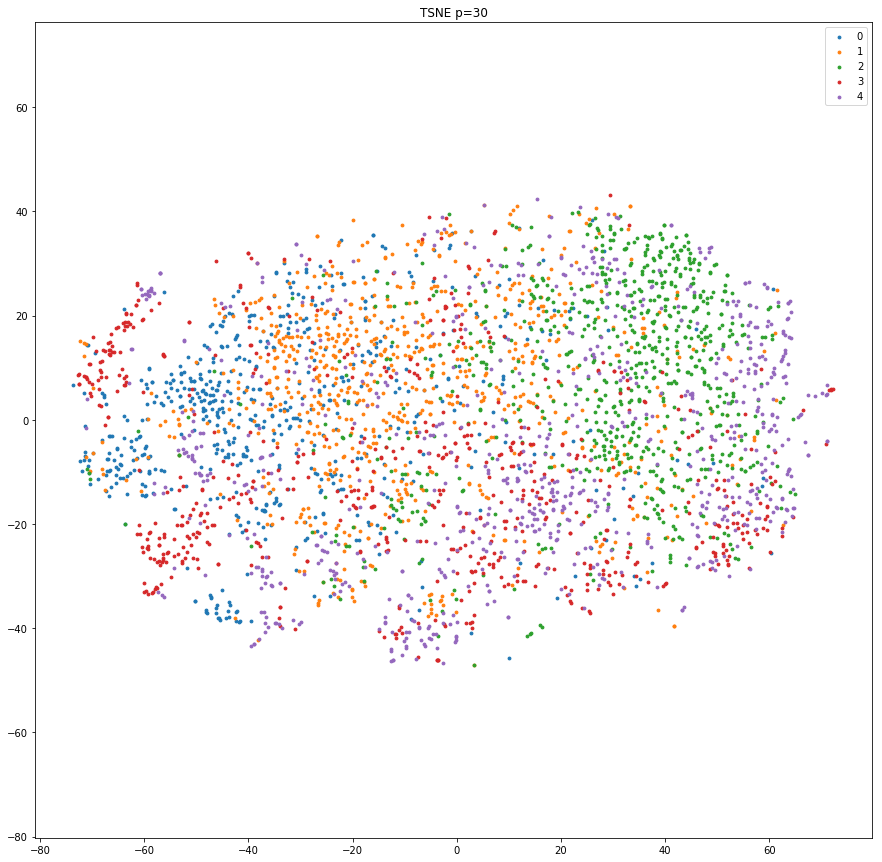

In [19]:
plot_embedding(TSNE(perplexity=30, random_state=42), X_all, y_all, title=' p=30')

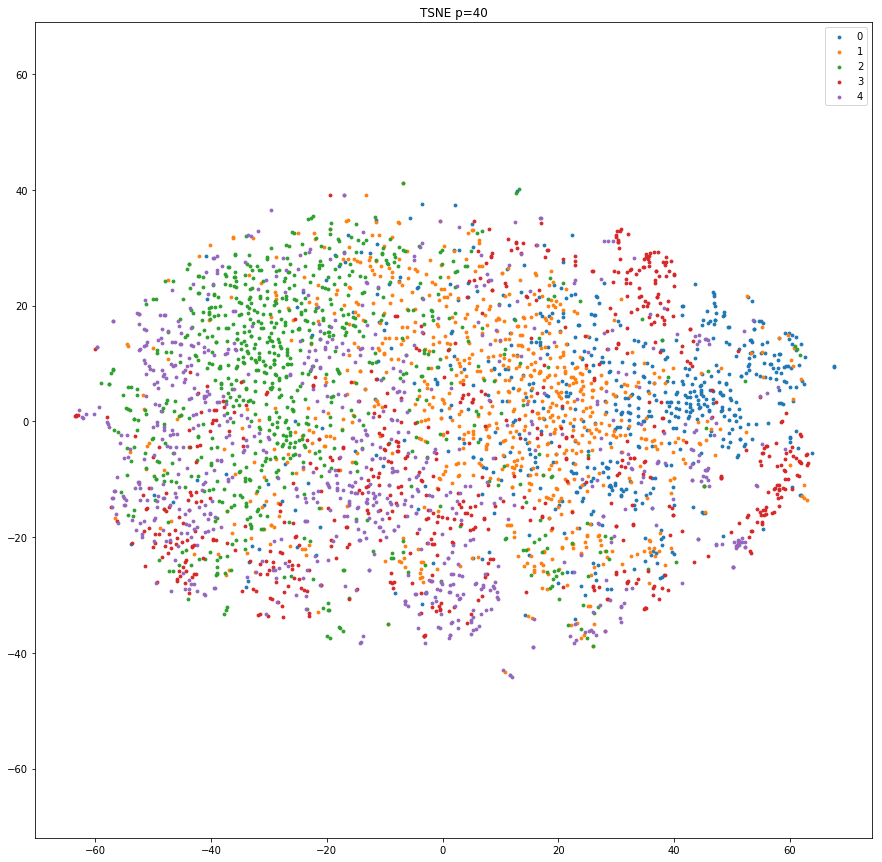

In [20]:
plot_embedding(TSNE(perplexity=40, random_state=42), X_all, y_all, title=' p=40')